

# Project: Investigate a Dataset (TMDb dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project of my Data Analysis, I am investigating a TMDb movies database files.Let's take a partial view at TMDb movie database csv file.

In [50]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import csv # read and write csv files
from datetime import datetime # operations to parse dates
import matplotlib.pyplot as plt
% matplotlib inline

In [51]:
#reading tmdb csv file and storing that to a variable
p_f="D:/tmdb-movies.csv"
d_t = pd.read_csv(p_f, encoding='utf-8')

#print out the first 5 rows of data in my dataset
d_t.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Questions i want to explore from data

 Q1. Movies with highest and lowest budget

Q2. profits made by movies over the years

Q3. Average runtime of all movies

Q4. Which are best genres?

<a id='wrangling'></a>
# Data Wrangling

### General Properties

In [52]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
import numpy as np
import pandas as pd
import csv # read and write csv files
from datetime import datetime # operations to parse dates
import matplotlib.pyplot as plt
% matplotlib inline



## Showing data types of columns

In [53]:
#reading tmdb csv file and storing that to a variable
p_f="D:/tmdb-movies.csv"
d_t = pd.read_csv(p_f, encoding='utf-8')

#showing data types of all columns
d_t.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

## Now converting Float data type into int because we don't need float data type

In [54]:
#applymap function changes the columns data type to the type 'argument' we pass
d1 = ['popularity', 'revenue_adj','budget_adj','vote_average']

d_t[d1] = d_t[d1].applymap(np.int64)
#shwoing the datatypes of all columns
d_t.dtypes

id                       int64
imdb_id                 object
popularity               int64
budget                   int64
revenue                  int64
original_title          object
cast                    object
homepage                object
director                object
tagline                 object
keywords                object
overview                object
runtime                  int64
genres                  object
production_companies    object
release_date            object
vote_count               int64
vote_average             int64
release_year             int64
budget_adj               int64
revenue_adj              int64
dtype: object

### Now  converting the 'release_date' column into date format

In [55]:
#calling the column which need to be formatted in datetime and storing those values in them
d_t.release_date = pd.to_datetime(d_t['release_date'])

#showing the dataset
d_t.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6,2015,137999939,1392445892
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7,2015,137999939,348161292


### release_date column has been changed to year-month-day.

# Data Cleaning (Dropping rows and colums that we dont need )

In [56]:
d_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null int64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null int64
release_year            10866 non-null int64
budget_adj           

### Lets see total number entries in data.... 

In [57]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
d_t.shape



(10866, 21)

### Therefore, we have 10866 rows and 21 columns

## Now dropping the data we dont need

In [58]:
#lets give a list of data that needs to be deleted
d2 = [ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

 
#deleting the columns from the database
d_t = d_t.drop(d2,axis = 1)
#now take a look at this new dataset
d_t.head(3)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


### Removing duplicate data....

In [59]:
#will drop duplicate rows but will keep the first one
d_t.drop_duplicates(keep = 'first', inplace = True)

#now lets see how many entries are there
d_t.shape


(10865, 11)

Now we have 10865 movie entries.

In [60]:
d_t.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


## Now we will check if we have any movie with a 0 runtime. If we have any, we will replace the value with NaN.

In [61]:
#replacing 0 with NaN of runtime column of the data.
d_t['runtime'] = d_t['runtime'].replace(0, np.NaN)

<a id='eda'></a>
# Exploratory Data Analysis

### Research Question 1 ( movie wth highest and lowest budget)

In [62]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
def sort(c_n):
    
    #taking the index value of the highest number in budget column
    h1 = d_t[c_n].idxmax()
    #calling by index number,storing that row info to a variable
    h2= pd.DataFrame(d_t.loc[h1])
    
  
    l1 = d_t[c_n].idxmin()
    l2 = pd.DataFrame(d_t.loc[l1])
    

    d1 = pd.concat([h2, l2], axis = 1)
    
    return d1


sort('budget')


,2244,30
popularity,0,3
budget,425000000,0
revenue,11087569,29355203
original_title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
director,Sngmoo Lee,Bill Condon
tagline,Assassin. Hero. Legend.,The man behind the myth
runtime,100,103
genres,Adventure|Fantasy|Action|Western|Thriller,Mystery|Drama
release_date,2010-12-02 00:00:00,2015-06-19 00:00:00


# Research Question 2(Profits made by movies over the years)

### Calculating profit

In [63]:

d_t.insert(2, 'profit', d_t['revenue'] - d_t['budget'])

d_t['profit'] = d_t['profit'].apply(np.int64)

d_t.head(2)

,popularity,budget,profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


## Plotting the graph

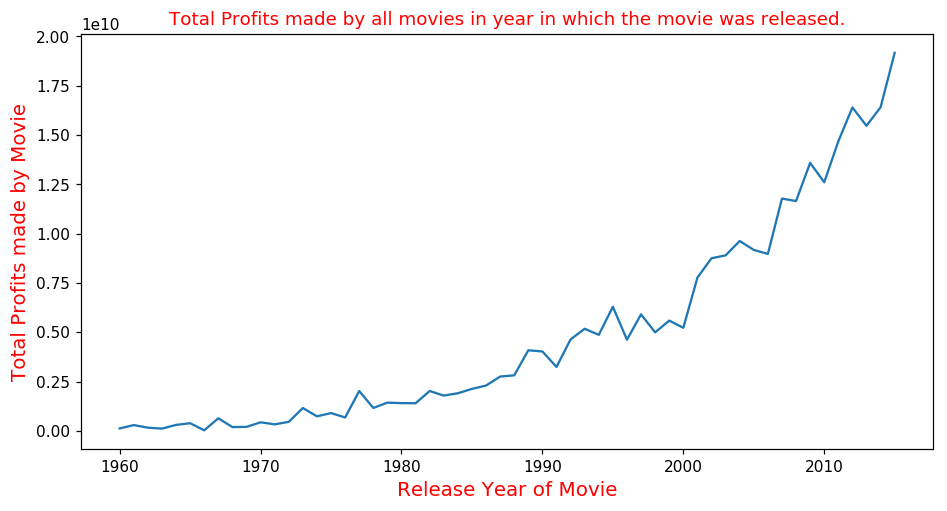

In [71]:
#Line plot is used for this
#we need to group all the movies for those years if we want to know the profits of movies for every year

py = d_t.groupby('release_year')['profit'].sum()
py = pd.DataFrame(py)
#(width, height)
plt.figure(figsize=(10,5), dpi = 110)

#x-axis
plt.xlabel('Release Year of Movie', color='r', fontsize = 13)
#y-axis
plt.ylabel('Total Profits made by Movie',color='r', fontsize = 13)
#title
plt.title('Total Profits made by all movies in year in which the movie was released.',color='r')

plt.plot(py)
#final graph
plt.show()

We can see that, the year 2016 had the most movie releases. The more old the movies, the less releases in that year. And it also shows us that the highest profit is in the year 2016 and is more than any other year..... 

# Research Question 3(What is the average runtime of all movies?)

## lets plot runtime distribution graph for more help..

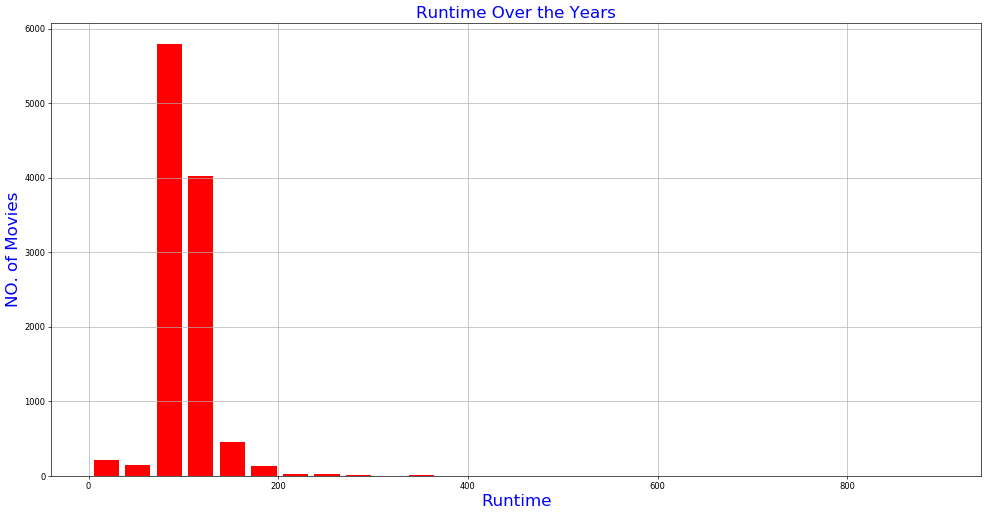

In [65]:
#plotting a histogram of runtime of movies
plt.figure(figsize=(20,10),dpi=60)
# label name for x-axis
plt.xlabel('Runtime', fontsize=20, color='blue')
# label name for y-axis
plt.ylabel('NO. of Movies',fontsize=20,color='blue')
# giving title to the graph
plt.title('Runtime Over the Years', fontsize = 20, color='blue')
#providing histogram data
d_t['runtime'].hist(rwidth =0.8,bins=27,color='red')
#displaying graph
plt.show()

### From the above graph we can see which movies lie between which interval.The time intervals for tallers bar are between 85-100 minutes(approx). The distribution of this graph is positively skewed or right skewed

## now lets calculate Average runtime of all movies....

In [66]:
#creatinga function to calculate average runtime 
def avg(c_n):
    return d_t[c_n].mean()

In [67]:
#calling the average runtime function we created abouve
avg('runtime')

102.3638545320288

### Therefore,Average runtime = 102 minutes approx

# Research Question 4(which are the best genre?)

In [68]:
#to answer this question we need to make a function that will extract the column data
def e_data(c_n):
    #seperate the selected column by '|'
    a_data = d_t[c_n].str.cat(sep = '|')
    #storing data in pandas 
    a_data = pd.Series(a_data.split('|'))
    
    count = a_data.value_counts(ascending = True)
    return count

In [69]:
#calling the e_data function 
g_c = e_data('genres')
g_c.head()

Western     165
TV Movie    167
Foreign     188
War         270
History     334
dtype: int64

## lets plot the graph to visualize more about above data

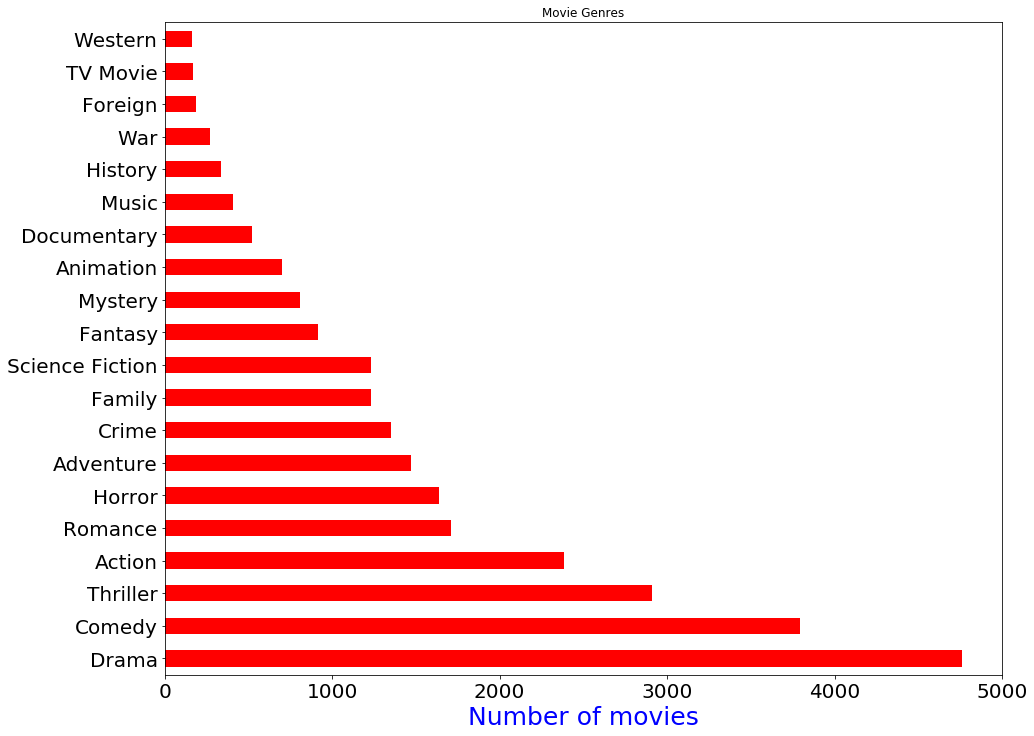

In [70]:
g_c.sort_values(ascending = False, inplace = True)

a1 = g_c.plot.barh(color = "red", fontsize = 20)
#title
a1.set( title = 'Movie Genres')
#x-axis
a1.set_xlabel('Number of movies', color = 'blue', fontsize = 25)
#(height,width)
a1.figure.set_size_inches(15,12)
#ploting the graph
plt.show()

### From the above graph Drama , Comedy, Thriller and Action are best genres

<a id='conclusions'></a>
# Conclusions


### As i have answered the questions that i thought were interesting i found out that

1. As the profit made over the years have been increasing very fast,the number of people going to watch movies have increased..
2. The runtime of movies over the years has been decreased as the avg runtime of movies is just 102 minutes approx..
3. After analysing the graph plotted for movie genres, Drama, Comedy, Thriller and Action are the best Genres

# "Thats my conclusion."

## limitaions: 
 I want to make it clear, it's not 100 percent guaranteed solution that this formula is gonna work. All these directors, actors, genres and released dates have a common trend of attraction.
The data does not confirm that every release of every movie is listed. It might skew our analysis by dropping missing from variables of our interest.
It gives people high expectations from the movie if we release a movie with these characteristics. It gives us less probability of meeting the expectations of the people having higher expectations.